In [1]:
import pandas as pd
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 75

In [2]:
df = pd.read_excel('MergedBalanced.xlsx')

In [3]:
label_encoder = LabelEncoder()
df['label']= label_encoder.fit_transform(df['label'])
df['label'].unique()

array([0, 1, 2, 3])

In [4]:
# Splitting the dataset into test/train datasets
X_train, X_test, y_train, y_test = train_test_split(df.text, df.label, test_size = 0.20, shuffle=True, random_state=42)

In [5]:
def classify(X_train, X_test, y_train, y_test):
    tfidf = TfidfVectorizer(tokenizer=word_tokenize, token_pattern=None)
    tfidf_train = tfidf.fit_transform(X_train)

    tfidf_test = tfidf.transform(X_test)

    

    lr =  LogisticRegression(solver= 'liblinear', penalty='l1', C = 100, max_iter = 300)
    lr.fit(tfidf_train, y_train)

    y_pred = lr.predict(tfidf_test)

    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    cm_disp.plot(xticks_rotation = 'vertical')
    plt.show()

              precision    recall  f1-score   support

           0       0.60      0.35      0.44       186
           1       0.72      0.64      0.68       308
           2       0.83      0.89      0.86      1406
           3       0.56      0.57      0.56       180

    accuracy                           0.78      2080
   macro avg       0.68      0.61      0.64      2080
weighted avg       0.77      0.78      0.77      2080



/home/sudheesh/anaconda3/envs/rubrix/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


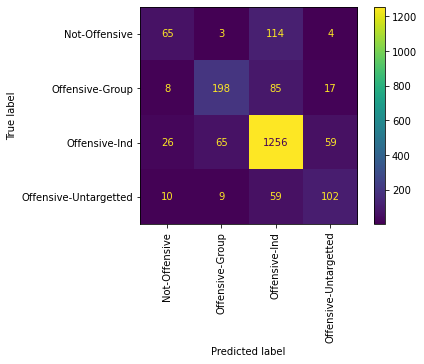

In [6]:
classify(X_train, X_test, y_train, y_test)

In [7]:
from xgboost import XGBClassifier

In [8]:
def xgclassify(X_train, X_test, y_train, y_test):
    tfidf = TfidfVectorizer(tokenizer=word_tokenize, token_pattern=None)
    tfidf_train = tfidf.fit_transform(X_train)

    tfidf_test = tfidf.transform(X_test)

    
 #xg =  XGBClassifier(eta=0.2, min_child_weight=50, subsample =0.8, alpha=500)
    xg =  XGBClassifier(max_depth= 10, subsample =0.75, alpha =10, eta =0.2)
    xg.fit(tfidf_train, y_train)

    y_pred = xg.predict(tfidf_test)

    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    cm_disp.plot(xticks_rotation = 'vertical')
    plt.show()

              precision    recall  f1-score   support

           0       0.65      0.33      0.44       186
           1       0.72      0.62      0.67       308
           2       0.82      0.93      0.87      1406
           3       0.74      0.47      0.58       180

    accuracy                           0.79      2080
   macro avg       0.73      0.59      0.64      2080
weighted avg       0.78      0.79      0.78      2080



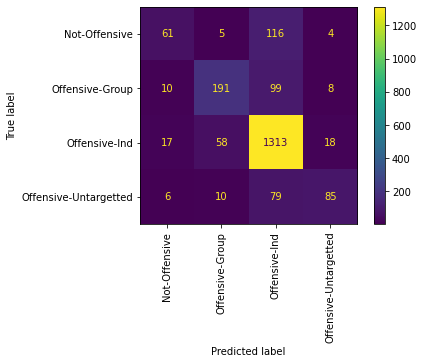

In [9]:
xgclassify(X_train, X_test, y_train, y_test)